In [7]:
#!/usr/bin/env python
"""
    Computer practical 45. Fabry Perot interferometer.
    ====================================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates the Fabry Perot interferometer.
    Measure the distance between two wavelengths. 
    Find the refractive index of a medium between the two mirrors.
    
    ..  :copyright: (c) 2017 by Fred van Goor.
    :license: MIT, see License for more details.
    
"""
import matplotlib
matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import sys
import webbrowser

if sys.version_info[0] < 3:
    from Tkinter import *
    import Tkinter as Tk
    import tkMessageBox
else:
    from tkinter import *
    import tkinter as Tk
    from tkinter import messagebox
from LightPipes import *
import math

root = Tk.Tk()
root.wm_title("Computer practical: 5. Fabry Perot.        LP-version = " + LPversion)
root.wm_protocol("WM_DELETE_WINDOW", root.quit)

''

In [8]:
labda=550*nm;
size=5*mm;
N=300

f=100*mm
r=0.7
d=6*mm
Dlabda=0.0
nmedium = 1.0
k=2*math.pi/labda;

D=DoubleVar()
R=DoubleVar()
DLABDA=DoubleVar()
NMEDIUM=DoubleVar()

D.set(d/mm)
R.set(r)
DLABDA.set(Dlabda/nm)
NMEDIUM.set(nmedium)

fig=plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

canvas = FigureCanvasTkAgg(fig, master=root)
canvas._tkcanvas.pack(side=Tk.LEFT, fill=Tk.BOTH, expand=1)
v=StringVar()

In [9]:
def TheExample(event):
    global I
    Dlabda=DLABDA.get()*nm
    nmedium=NMEDIUM.get()
    d=D.get()*mm
    r=R.get()
    k2 = 2 * math.pi / (labda + Dlabda)
    Fin = 4.0 * r / (1.0 - r)
    F=Begin(size,labda,N);
    I=Intensity(1,F);
    step = size / N/mm;
    for i in range(1,N):
        xray = i * step;
        for j in range(1,N):
            yray = j * step;
            X =  xray*mm - size / 2;
            Y =  yray*mm - size / 2;
            radius = math.sqrt(X*X + Y*Y);
            theta = radius / f;
            delta2 = k * nmedium * d * math.cos(theta);
            Inten = 0.5 / (1 + Fin * math.pow(math.sin(delta2), 2));
            delta2 = k2 * nmedium * d * math.cos(theta);
            I[i][j] = (Inten + 0.5 / (1 + Fin * math.pow(math.sin(delta2), 2)));
    ax1.clear()
    ax1.imshow(I,cmap='hot')
    ax1.axis('off'); ax1.axis('equal');
    str='Intensity distribution'
    ax1.set_title(str)
    canvas.draw()

def motion(event):
    x=event.xdata;y=event.ydata
    if (x and y is not None and x>0 and x<N and y>0 and y<N):
        v.set('x=%3.2f mm, y=%3.2f mm\n I=%3.3f [a.u.]' %((-size/2+x*size/N)/mm,(-size/2+y*size/N)/mm,I[int(x)][int(y)]))
        root.configure(cursor='crosshair')
    else:
        v.set('')
        root.configure(cursor='arrow')

def _quit():
    root.quit()

In [10]:
Scale(  root,
        takefocus = 1,
        orient='horizontal',
        label = 'mirror reflectivity',
        length = 200, from_=0.0, to=0.99,
        resolution = 0.01,
        variable = R,
        cursor="hand2",
        command = TheExample).pack()
        
Scale(  root,
        takefocus = 1,
        orient='horizontal',
        label = 'distance between mirrors [mm]',
        length = 200, from_=0.0, to=10.000,
        resolution = 0.001,
        variable = D,
        cursor="hand2",
        command = TheExample).pack()
        
def cb():
    TheExample(0)
    
def openbrowser(event):
    webbrowser.open_new(r"https://opticspy.github.io/lightpipes/FabryPerot.html")
    
Checkbutton(root,
            text="insert medium between mirrors",
            onvalue=1.73,
            offvalue=1.0,
            variable=NMEDIUM,
            cursor="hand2",
            command = cb).pack()
            
Checkbutton(root,
            text="dual wavelength",
            onvalue=1.8,
            offvalue=0.0,
            variable=DLABDA,
            cursor="hand2",
            command = cb).pack()
            
Button( root,
        width = 24,
        text='Quit',
        cursor="hand2",
        command=_quit).pack(pady=10)
        
link = Label(root, text="help", fg="blue", cursor="hand2")
link.pack()
link.bind("<Button-1>", openbrowser)

Label(root, textvariable=v).pack(pady=50)

cid = fig.canvas.mpl_connect('motion_notify_event', motion)

In [11]:
TheExample(0)
root.mainloop()
root.destroy()

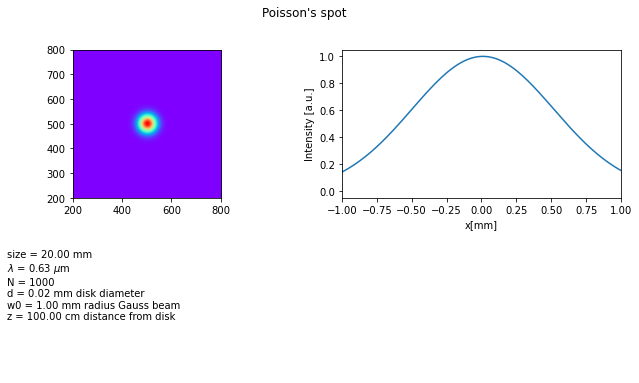

In [5]:
from LightPipes import *
import matplotlib.pyplot as plt
import numpy as np

wavelength=0.63*um
size=20.0*mm
N=1000
N2=int(N/2)
d=20*um
w0=size/20
z=100*cm

F=Begin(size,wavelength,N)
F=GaussBeam(F, w0)
F=CircScreen(F,d/2)
F=Fresnel(F,z)
I=Intensity(F,1)

s2 =    f'size = {size/mm:4.2f} mm' + '\n'\
        f'$\lambda$ = {wavelength/um:4.2f} $\mu$m' + '\n'\
        f'N = {N:d}' + '\n' +\
        f'd = {d/mm:4.2f} mm disk diameter' + '\n'\
        f'w0 = {w0/mm:4.2f} mm radius Gauss beam' + '\n'\
        f'z = {z/cm:4.2f} cm distance from disk' + '\n'\

fig=plt.figure(figsize=(11,6))
fig.suptitle("Poisson's spot")
ax1 = fig.add_subplot(221);#ax1.axis('off')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223);ax3.axis('off')
ax1.set_xlim(N2-300,N2+300)
ax1.set_ylim(N2-300,N2+300)
ax1.imshow(I,cmap='rainbow')

X=np.linspace(-size/2,size/2,N)
ax2.plot(X/mm,I[N2]); ax2.set_xlabel('x[mm]'); ax2.set_ylabel('Intensity [a.u.]')
ax2.set_xlim(-1,1); 
ax3.text(0.0,0.3,s2)
plt.show()